In [1]:
from google.colab import drive 
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [2]:
!unzip /content/gdrive/MyDrive/energy.zip

Archive:  /content/gdrive/MyDrive/energy.zip
  inflating: Tamil Nadu/34693_9.35_77.55_2003.csv  
  inflating: Tamil Nadu/34693_9.35_77.55_2009.csv  
  inflating: MP/44412_24.25_80.45_2012.csv  
  inflating: Tamil Nadu/34693_9.35_77.55_2000.csv  
  inflating: Tamil Nadu/34693_9.35_77.55_2013.csv  
  inflating: Tamil Nadu/34693_9.35_77.55_2010.csv  
  inflating: MP/44412_24.25_80.45_2001.csv  
  inflating: Tamil Nadu/34693_9.35_77.55_2014.csv  
  inflating: MP/44412_24.25_80.45_2014.csv  
  inflating: MP/44412_24.25_80.45_2005.csv  
  inflating: Tamil Nadu/34693_9.35_77.55_2007.csv  
  inflating: MP/44412_24.25_80.45_2007.csv  
  inflating: Tamil Nadu/34693_9.35_77.55_2004.csv  
  inflating: MP/44412_24.25_80.45_2010.csv  
  inflating: MP/44412_24.25_80.45_2009.csv  
  inflating: MP/44412_24.25_80.45_2004.csv  
  inflating: Tamil Nadu/34693_9.35_77.55_2006.csv  
  inflating: MP/44412_24.25_80.45_2000.csv  
  inflating: MP/44412_24.25_80.45_2003.csv  
  inflating: MP/44412_24.25_80.45_200

In [3]:
!pwd

/content


In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = r'./Andhra Pradesh'
print(path)
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename,index_col=None, header=0,skiprows=2,usecols=[0,1,2,3,4,7])
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

./Andhra Pradesh


In [5]:
frame.head()

,Year,Month,Day,Hour,Minute,GHI
0,2011,1,1,0,0,0
1,2011,1,1,1,0,0
2,2011,1,1,2,0,0
3,2011,1,1,3,0,0
4,2011,1,1,4,0,0


In [6]:
frame.sort_values(by=['Year'])

,Year,Month,Day,Hour,Minute,GHI
26276,2000,12,31,20,0,0
20427,2000,5,2,3,0,0
20428,2000,5,2,4,0,0
20429,2000,5,2,5,0,0
20430,2000,5,2,6,0,49
...,...,...,...,...,...,...
125560,2014,5,2,16,0,403
125561,2014,5,2,17,0,154
125562,2014,5,2,18,0,1
125556,2014,5,2,12,0,990


In [2]:
frame['Date']=frame['Year'].astype(str) + frame['Month'].astype(str).str.zfill(2) + frame['Day'].astype(str).str.zfill(2) + frame['Hour'].astype(str).str.zfill(2)+frame['Minute'].astype(str)

frame['Date'] = pd.to_datetime(frame['Date'], format='%Y%m%d%H%M')

In [3]:
frame.sort_values(by=['Year'])

,Year,Month,Day,Hour,Minute,GHI,Date
26276,2000,12,31,20,0,0,2000-12-31 20:00:00
20427,2000,5,2,3,0,0,2000-05-02 03:00:00
20428,2000,5,2,4,0,0,2000-05-02 04:00:00
20429,2000,5,2,5,0,0,2000-05-02 05:00:00
20430,2000,5,2,6,0,49,2000-05-02 06:00:00
...,...,...,...,...,...,...,...
125560,2014,5,2,16,0,403,2014-05-02 16:00:00
125561,2014,5,2,17,0,154,2014-05-02 17:00:00
125562,2014,5,2,18,0,1,2014-05-02 18:00:00
125556,2014,5,2,12,0,990,2014-05-02 12:00:00


In [4]:
import datetime as dt

df_all = frame[['Date','GHI']]
single = df_all['Date']

In [5]:
df_all.set_index('Date',inplace=True)

In [6]:
df_all = df_all.between_time('09:00','15:00')

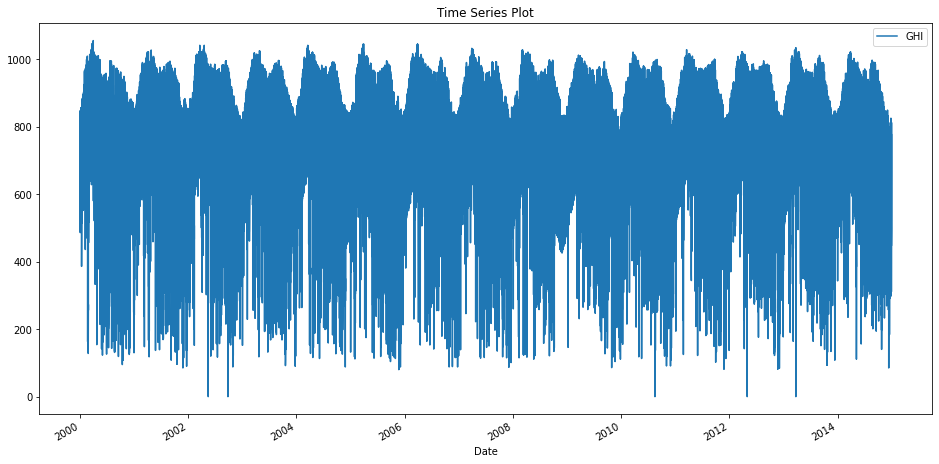

In [12]:
df_all.plot(figsize=[16,8],title='Time Series Plot')

In [7]:
df_all.fillna(df_all.mean(),inplace=True)

In [8]:
y=df_all['GHI'].resample('W-MON').mean()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


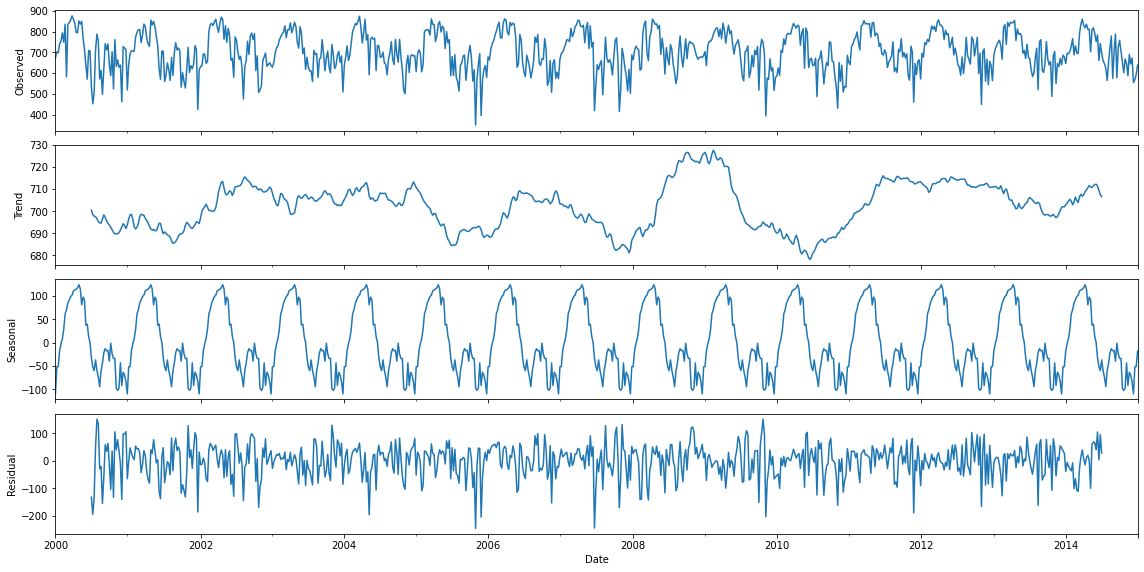

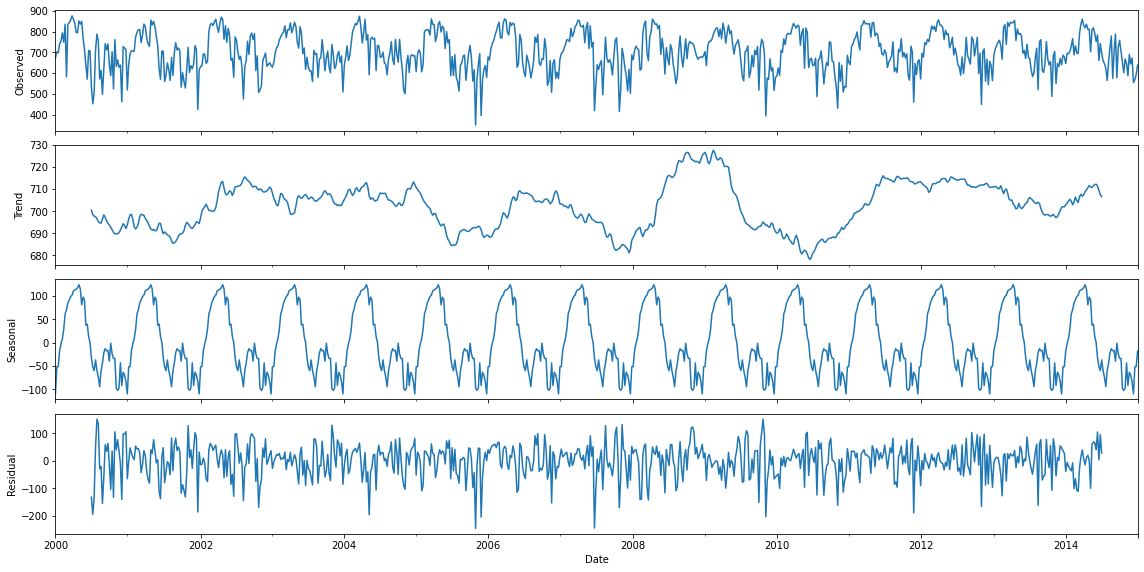

In [15]:
#ETS Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(y,model='additive')

#printing decomposed time series
import pylab
pylab.rcParams['figure.figsize'] = (16, 8)
result.plot()

In [16]:
y.head()

Date
2000-01-03    673.761905
2000-01-10    702.244898
2000-01-17    697.673469
2000-01-24    740.020408
2000-01-31    753.285714
Freq: W-MON, Name: GHI, dtype: float64

In [19]:
from statsmodels.tsa.arima_model import ARIMA


model=ARIMA(y,order=(2,0,1))
model_fit=model.fit()

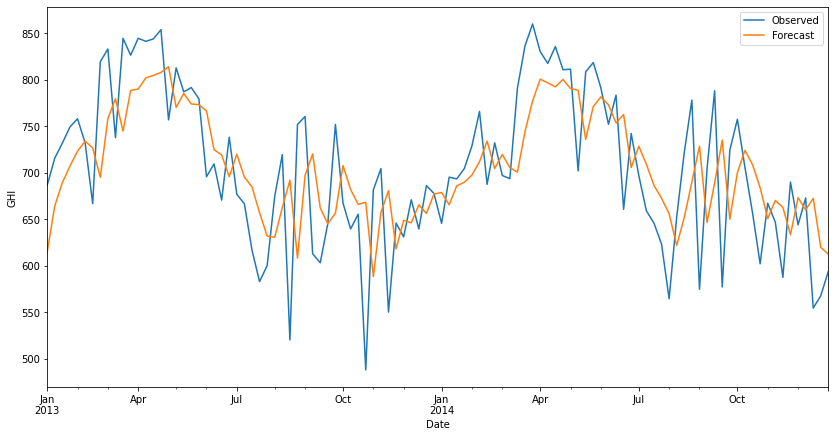

In [23]:
# pred = model_fit.predict(start=pd.to_datetime('2013-01-07'),end=pd.to_datetime('2014-12-29'), dynamic=False)

#Plot observed data
ax = y['2013':'2014'].plot(label='Observed')

#Plot predicted data
pred.plot(ax=ax, label='Forecast', alpha=1, figsize=(14, 7))

#Generate a confidence interval
# pred_ci = pred.conf_int()
# ax.fill_between(pred_ci.index,
                # pred_ci.iloc[:, 0],
                # pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('GHI')
plt.legend()
plt.show()

In [24]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

y_forecasted = pred
y_truth = y['2013-01-07':'2014-12-29']

mean_absolute_percentage_error(y_truth,y_forecasted)

7.841623398901783

In [21]:
pred

Date
2013-01-07    614.541419
2013-01-14    664.273490
2013-01-21    689.334538
2013-01-28    707.045739
2013-02-04    723.048020
                 ...    
2014-12-01    673.068600
2014-12-08    659.916933
2014-12-15    672.337867
2014-12-22    619.540133
2014-12-29    612.169969
Freq: W-MON, Length: 104, dtype: float64

In [25]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 11.7MB/s 
     |████████████████████████████████| 808kB 49.5MB/s 
     |████████████████████████████████| 2.1MB 51.2MB/s 
     |████████████████████████████████| 8.7MB 30.7MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: setuptools 50.3.2
    Uninstalling setuptools-50.3.2:
      Successfully uninstalled setuptools-50.3.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
y.describe()

count    784.000000
mean     702.463826
std       94.413241
min      349.122449
25%      640.193878
50%      702.632653
75%      774.408163
max      875.673469
Name: GHI, dtype: float64

In [9]:
import pmdarima as pmd

def arimamodel(timeseriesarray):
    autoarima_model = pmd.auto_arima(timeseriesarray, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              trace=True)
    return autoarima_model

In [10]:
from pmdarima import auto_arima
model = auto_arima(y, trace=True, error_action='ignore', suppress_warnings=True)

model.summary()


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8930.645, Time=0.85 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=9358.659, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8967.237, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9116.241, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=12518.517, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8934.904, Time=0.42 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8941.441, Time=0.24 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8928.883, Time=1.67 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=8937.937, Time=0.41 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=8908.470, Time=1.82 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=8923.576, Time=0.53 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=8908.509, Time=2.35 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8914.606, Time=2.22 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.05 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   :

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  784
Model:               SARIMAX(4, 0, 4)   Log Likelihood               -4443.399
Date:                Wed, 18 Nov 2020   AIC                           8906.798
Time:                        13:50:56   BIC                           8953.442
Sample:                             0   HQIC                          8924.734
                                - 784                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    182.1398     33.882      5.376      0.000     115.733     248.547
ar.L1          0.9694      0.084     11.473      0.000       0.804       1.135
ar.L2          0.0396      0.152      0.261      0.794      -0.258       0.337
ar.L3         -0.9884      0.147     -6.721      0.000      -1.277      -0.700
ar.L4          0.7202      0.076      9.456      0.000       0.571       0.870
ma.L1         -0.5095      0.094     -5.403      0.000      -0.694      -0.325
ma.L2         -0.1643      0.132     -1.242      0.214      -0.424       0.095
ma.L3          0.8929      0.122      7.336      0.000       0.654       1.132
ma.L4         -0.2451      0.068     -3.609      0.000      -0.378      -0.112
sigma2      4868.0217    216.129     22.524      0.000    4444.417    5291.627
===================================================================================
Ljung-Box (Q):                       79.26   Jarque-Bera (JB):               226.10
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -1.01
Prob(H) (two-sided):                  0.40   Kurtosis:                         4.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
model.fit(y)

ARIMA(maxiter=50, method='lbfgs', order=(4, 0, 4), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  784
Model:               SARIMAX(4, 0, 4)   Log Likelihood               -4443.399
Date:                Wed, 18 Nov 2020   AIC                           8906.798
Time:                        13:51:33   BIC                           8953.442
Sample:                             0   HQIC                          8924.734
                                - 784                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    182.1398     33.882      5.376      0.000     115.733     248.547
ar.L1          0.9694      0.084     11.473      0.000       0.804       1.135
ar.L2          0.0396      0.152      0.261      0.794      -0.258       0.337
ar.L3         -0.9884      0.147     -6.721      0.000      -1.277      -0.700
ar.L4          0.7202      0.076      9.456      0.000       0.571       0.870
ma.L1         -0.5095      0.094     -5.403      0.000      -0.694      -0.325
ma.L2         -0.1643      0.132     -1.242      0.214      -0.424       0.095
ma.L3          0.8929      0.122      7.336      0.000       0.654       1.132
ma.L4         -0.2451      0.068     -3.609      0.000      -0.378      -0.112
sigma2      4868.0217    216.129     22.524      0.000    4444.417    5291.627
===================================================================================
Ljung-Box (Q):                       79.26   Jarque-Bera (JB):               226.10
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -1.01
Prob(H) (two-sided):                  0.40   Kurtosis:                         4.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
val = y['2013':'2014'].to_numpy()
#making predictions for as many weeks as in original test set 2013-14
pred = model.predict(n_periods=len(val))

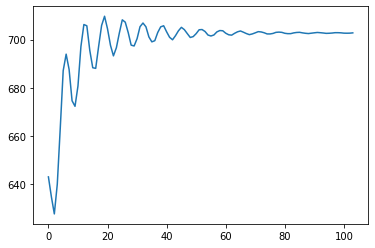

In [14]:
plt.plot(pred)

In [15]:
pred[:200]

array([643.02549682, 634.80148123, 627.66212742, 640.002507  ,
       663.09373082, 687.10176955, 693.95089224, 687.60487977,
       674.62415827, 672.30989763, 680.75783148, 697.11616046,
       706.24767708, 705.73088492, 695.50656856, 688.32983763,
       688.05502498, 697.23837028, 705.86023051, 709.68511463,
       704.45939503, 697.63664779, 693.24438917, 696.6362577 ,
       702.73076274, 708.20098242, 707.22931912, 702.92279882,
       697.69177085, 697.35025351, 700.36895196, 705.35082145,
       706.87007115, 705.31040803, 701.10839254, 699.0593733 ,
       699.54239133, 702.95966627, 705.29060314, 705.73246295,
       703.22321861, 700.96534457, 699.91912749, 701.61395372,
       703.64012729, 705.07946628, 704.12631   , 702.47717257,
       700.87726539, 701.239726  , 702.47134656, 704.07336437,
       704.16464112, 703.36023687, 701.88755902, 701.49161404,
       701.91029393, 703.17681334, 703.75192553, 703.66061211,
       702.64452054, 701.99957129, 701.83855568, 702.59

In [21]:
y['2013':'2014'].keys()

DatetimeIndex(['2013-01-07', '2013-01-14', '2013-01-21', '2013-01-28',
               '2013-02-04', '2013-02-11', '2013-02-18', '2013-02-25',
               '2013-03-04', '2013-03-11',
               ...
               '2014-10-27', '2014-11-03', '2014-11-10', '2014-11-17',
               '2014-11-24', '2014-12-01', '2014-12-08', '2014-12-15',
               '2014-12-22', '2014-12-29'],
              dtype='datetime64[ns]', name='Date', length=104, freq='W-MON')

In [22]:
data_auto=pd.DataFrame(y['2013':'2014'].keys())

In [35]:
data_auto.insert(1,"value",pred, True)

In [36]:
data_auto

,Date,value
0,2013-01-07,643.025497
1,2013-01-14,634.801481
2,2013-01-21,627.662127
3,2013-01-28,640.002507
4,2013-02-04,663.093731
...,...,...
99,2014-12-01,702.804883
100,2014-12-08,702.669334
101,2014-12-15,702.644818
102,2014-12-22,702.668572


In [37]:
data_auto.set_index('Date',inplace=True)

In [38]:
data_auto

,value
Date,
2013-01-07,643.025497
2013-01-14,634.801481
2013-01-21,627.662127
2013-01-28,640.002507
2013-02-04,663.093731
...,...
2014-12-01,702.804883
2014-12-08,702.669334
2014-12-15,702.644818


In [39]:
y_auto=data_auto['value'].resample('W-MON').mean()

In [40]:
y_auto

Date
2013-01-07    643.025497
2013-01-14    634.801481
2013-01-21    627.662127
2013-01-28    640.002507
2013-02-04    663.093731
                 ...    
2014-12-01    702.804883
2014-12-08    702.669334
2014-12-15    702.644818
2014-12-22    702.668572
2014-12-29    702.784869
Freq: W-MON, Name: value, Length: 104, dtype: float64

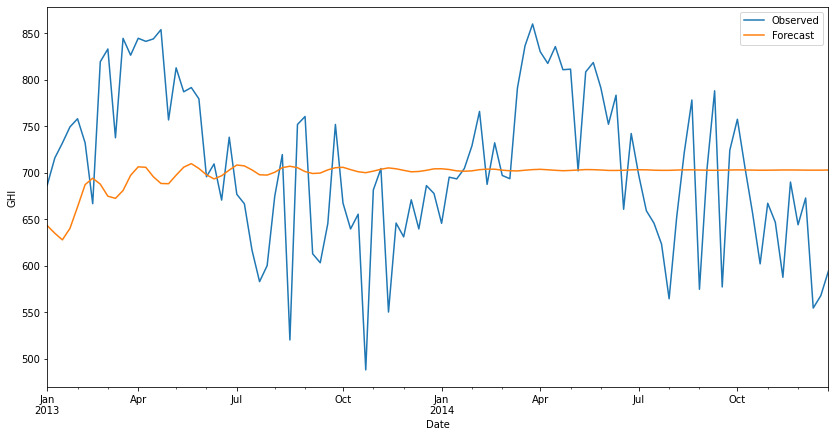

In [41]:
#Plot observed data
ax = y['2013':'2014'].plot(label='Observed')

#Plot predicted data
y_auto.plot(ax=ax, label='Forecast', alpha=1, figsize=(14, 7))

#Generate a confidence interval
# pred_ci = pred.conf_int()
# ax.fill_between(pred_ci.index,
                # pred_ci.iloc[:, 0],
                # pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('GHI')
plt.legend()
plt.show()

In [43]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

y_forecasted = y_auto
y_truth = y['2013-01-07':'2014-12-29']

mean_absolute_percentage_error(y_truth,y_forecasted)

10.386741731925337